# digits数据集降维可视化


> 该文件仅供自己学习使用，请勿 `转载` & `商用`

digits数据集是 sklearn内置的手写数字图像数据集,每张图像长宽都为8个像素,也就是说,用64维的向量定义一个数据

下面,我们用PCA主成分分析、TSNE非线性降维,将这个数据集中的图像压缩到2维和3维空间并进行可视化。
* 导入digits数据集
* 探索数据结构
* 可视化一些图像样本
* PAC主成分分析降维
* T-SNE非线性降维

### 导入工具库

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False   #用来正常显示负号

import numpy as np  #导入科学计算库numpy

In [2]:
from sklearn import datasets  #导入sklearn中的datasets模块

In [3]:
# 用于忽略后面出现的各种报错提示
import warnings
warnings.filterwarnings("ignore")

# 导入digits数据集

In [4]:
digits = datasets.load_digits()

In [5]:
digits  #显示digits数据集内容

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
digits.keys()   #输出含有的所有的标签的名字

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
digits.target_names   #target_names是上面的一个标签名

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
print(digits.DESCR)   #打印数据集的描述  

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

上述代码不加 `print` 输出中会带有 `\n`

# 探索数据结构

In [9]:
data = digits.data  #取出data键
label = digits.target  #取出target键

In [10]:
data.shape   #查看data的数据大小 1797张 64像素点的图片

(1797, 64)

In [11]:
n_samples,n_features = data.shape  #把 图片张数 和 图片像素值 传入

In [12]:
n_samples,n_features

(1797, 64)

In [13]:
label  #查看标签内容

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
label[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# T-SNE降维

In [15]:
from sklearn.manifold import TSNE  #从sklearn的流形学习库中导入
tsne = TSNE(n_components=2,init='pca',random_state=0) # n_components 降维到两维  random_state 设置随机种子
# tsne = TSNE(n_components=2)  #也可以不设置随机种子

In [16]:
data.shape  #原始数据shape

(1797, 64)

In [17]:
X_tsne = tsne.fit_transform(data)  #对原始的数据 data 进行拟合和转换

In [18]:
X_tsne.shape  #转换后数据维度

(1797, 2)

In [19]:
X_tsne

array([[ -3.8610353,  57.3879   ],
       [ 29.568838 , -16.465034 ],
       [ 19.66333  ,  -8.173782 ],
       ...,
       [ 11.811556 , -13.87739  ],
       [-18.473366 ,  28.832268 ],
       [  7.2237077, -10.434835 ]], dtype=float32)

In [20]:
x_min,x_max = np.min(X_tsne,0),np.max(X_tsne,0)  #把最大最小数据取出

In [21]:
x_min  #最小

array([-52.633205, -63.88959 ], dtype=float32)

In [22]:
x_max  #最大

array([71.12566, 65.63741], dtype=float32)

In [23]:
X_tsne.shape  #转换后数据维度

(1797, 2)

In [24]:
#将降维后的坐标进行归一化
X_tsne = (X_tsne - x_min)/(x_max - x_min)

In [25]:
X_tsne   #归一化之后数据就变成0→1之间的数字了

array([[0.39409032, 0.93631047],
       [0.66421133, 0.36613643],
       [0.5841726 , 0.43014818],
       ...,
       [0.52072847, 0.38611406],
       [0.27601933, 0.71584964],
       [0.4836576 , 0.41269198]], dtype=float32)

## 二位可视化

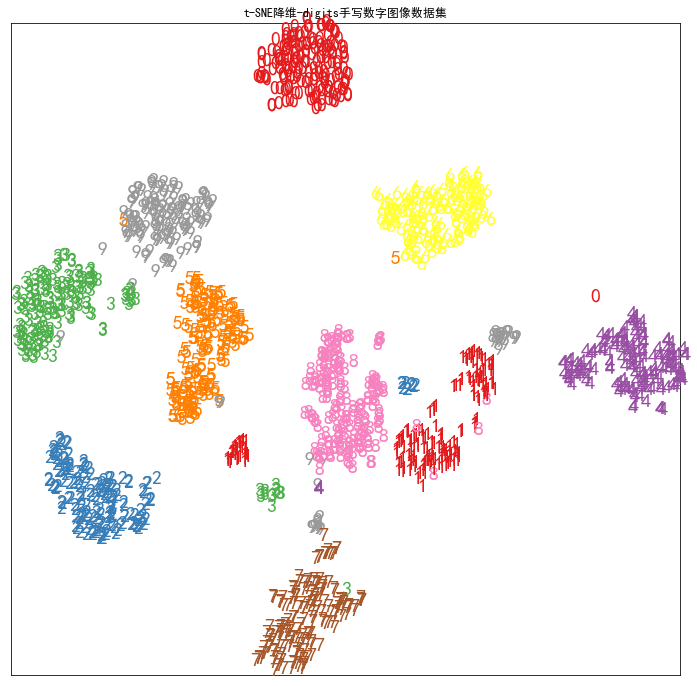

In [26]:
#做出数据的散点图
plt.figure(figsize=(12,12))
for i in range(data.shape[0]):
    plt.text(X_tsne[i,0],X_tsne[i,1],str(label[i]),color=plt.cm.Set1(label[i]/10.),fontdict={'weight':'bold','size':20})
plt.xticks([])
plt.yticks([])
plt.title('t-SNE降维-digits手写数字图像数据集')
plt.show()

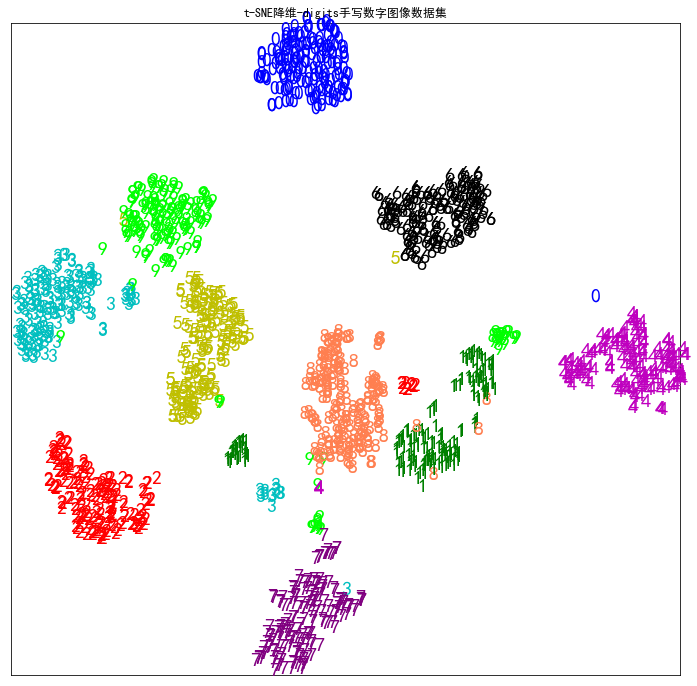

In [27]:
# 耕田数据颜色和数据字号
plt.figure(figsize=(12,12))
colors = ['b','g','r','c','m','y','k','purple','coral','lime']
for i in range(data.shape[0]):
    plt.text(X_tsne[i,0],X_tsne[i,1],str(label[i]),color=colors[label[i]],fontdict={'weight':'bold','size':20})
plt.xticks([])
plt.yticks([])
plt.title('t-SNE降维-digits手写数字图像数据集')
plt.show()

## 三维可视化

In [28]:
from sklearn.manifold import TSNE  #从sklearn的流形学习库中导入
# 降到三位
tsne3 = TSNE(n_components=3)  # 不设置随机种子

In [29]:
X_tsne3 = tsne3.fit_transform(data)  #对原始的数据 data 进行拟合和转换

In [30]:
x_min_3,x_max_3 = np.min(X_tsne3,0),np.max(X_tsne3,0)  #把最大最小数据取出

In [31]:
#将降维后的坐标进行归一化
X_tsne3 = (X_tsne3 - x_min_3)/(x_max_3 - x_min_3)

In [32]:
X_tsne3

array([[0.39207897, 0.09299301, 0.20187345],
       [0.45106822, 0.77235353, 0.55685806],
       [0.704563  , 0.51007736, 0.32366863],
       ...,
       [0.5792186 , 0.5123683 , 0.45540228],
       [0.51503253, 0.184668  , 0.62038857],
       [0.6548443 , 0.39717343, 0.46357068]], dtype=float32)

In [33]:
Y_train = label

In [34]:
Y_train

array([0, 1, 2, ..., 8, 9, 8])

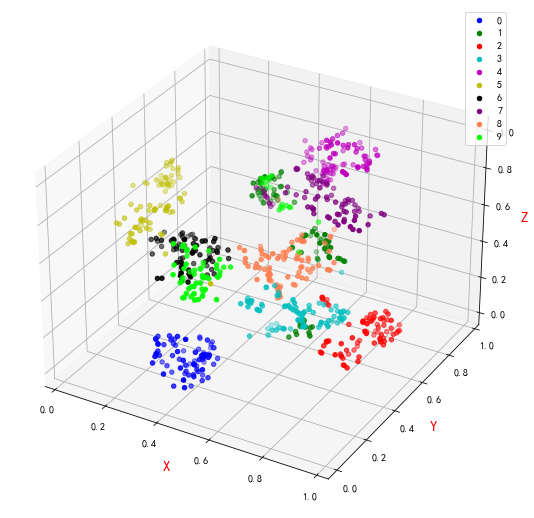

In [35]:
# TSNE降维到三位，散点图可视化
from mpl_toolkits.mplot3d import Axes3D  #空间三维画图

# 指定十种颜色
colors = [ 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple','coral', 'lime' ]
colors_map = Y_train

nb_classes = 10  # 一共10个类

#绘制散点图
fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)

# 遍历每一种数字
for cl in range(nb_classes):
    # 找到属于某种数字数据的索引号
    indices = np.where(colors_map == cl)[0]
    # 在空间直角坐标系中绘制数据点
    ax.scatter(X_tsne3[indices[:80],0],X_tsne3[indices[:80],1],X_tsne3[indices[:80],2],c=colors[cl],label=cl)
    
# 添加坐标轴
ax.set_zlabel('Z',fontdict={'size':15,'color':'red'})
ax.set_ylabel('Y',fontdict={'size':15,'color':'red'})
ax.set_xlabel('X',fontdict={'size':15,'color':'red'})
plt.legend()
plt.show()   

# PCA主成分分析降维

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [43]:
X_pca = pca.fit_transform(data)

In [44]:
X_pca

array([[ -1.25946575,  21.27488204],
       [  7.95761385, -20.76869795],
       [  6.99192117,  -9.95598574],
       ...,
       [ 10.8012841 ,  -6.96025321],
       [ -4.87209862,  12.42395615],
       [ -0.34439231,   6.36554794]])

In [50]:
#将降维后的坐标进行归一化
x_min_4,x_max_4=np.min(X_pca,0),np.max(X_pca,0)
X_pca = (X_pca - x_min_4)/(x_max_4 - x_min_4)

In [51]:
X_pca

array([[0.47575035, 0.84688596],
       [0.62235565, 0.11679354],
       [0.60699551, 0.30455774],
       ...,
       [0.66758659, 0.35657904],
       [0.41828842, 0.69318844],
       [0.49030535, 0.58798337]])

## 二维可视化

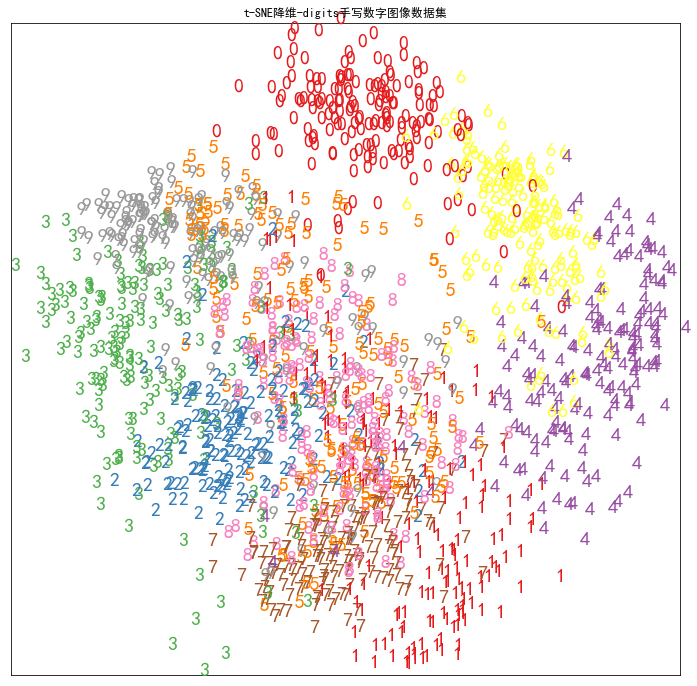

In [54]:
# PCA降维二维可视化
plt.figure(figsize=(12,12))
for i in range(data.shape[0]):
    plt.text(X_pca[i,0],X_pca[i,1],str(label[i]),color=plt.cm.Set1(label[i]/10.),fontdict={'weight':'bold','size':20})
plt.xticks([])
plt.yticks([])
plt.title('PCA降维-digits手写数字图像数据集')
plt.show()

## 三维可视化

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca_2 = pca.fit_transform(data)
# 将降维后的坐标归一化
x_min_5,x_max_5 = np.min(X_pca_2,0),np.max(X_pca_2,0)
X_pca_2 = (X_pca_2 - x_min_5)/(x_max_5 - x_min_5)

In [56]:
X_pca_2

array([[0.47575036, 0.84688605, 0.31992406],
       [0.62235565, 0.11679358, 0.54412045],
       [0.60699553, 0.30455769, 0.52023844],
       ...,
       [0.6675866 , 0.35657909, 0.56282778],
       [0.41828839, 0.69318837, 0.30850983],
       [0.49030539, 0.58798337, 0.64626776]])

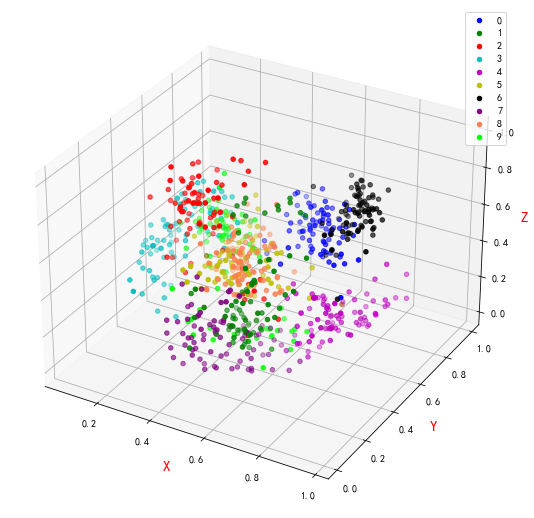

In [57]:
# PCA降维降到三维，散点图可视化
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图

# 指定十种颜色
colors = [ 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple','coral', 'lime' ]
colors_map = Y_train

nb_classes = 10  # 一共10个类

#绘制散点图
fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)

# 遍历每一种数字
for cl in range(nb_classes):
    # 找到属于某种数字数据的索引号
    indices = np.where(colors_map == cl)[0]
    # 在空间直角坐标系中绘制数据点
    ax.scatter(X_pca_2[indices[:80],0],X_pca_2[indices[:80],1],X_pca_2[indices[:80],2],c=colors[cl],label=cl)
    
# 添加坐标轴
ax.set_zlabel('Z',fontdict={'size':15,'color':'red'})
ax.set_ylabel('Y',fontdict={'size':15,'color':'red'})
ax.set_xlabel('X',fontdict={'size':15,'color':'red'})
plt.legend()
plt.show()   